In [1]:
#irisに関するデータの読み込み
   # ３品種　４つの特徴量　サンプル数150個
    
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
print("Feature names: {}".format(iris_dataset['feature_names']))
print("Target names: {}".format(iris_dataset['target_names']))
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
#　サンプルをランダムに学習用データとテスト用データに分ける
   # X:特徴量ベクトル　　y:　品種

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE684C72E8>,
      dtype=object)

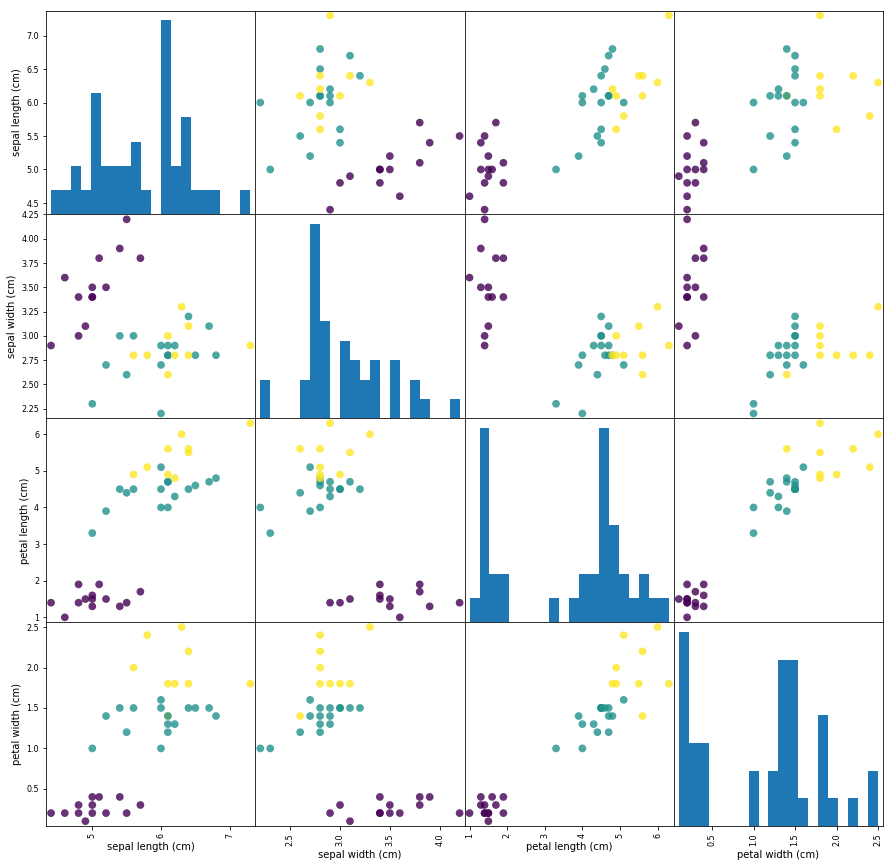

In [8]:
#　データの特徴を表示
  #　４特徴量の２つを選び散布図として表示

from IPython.display import display
#import mglearn
import pandas as pd

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame(X_test, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_test, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)

In [34]:
# SVM法　を組み込む
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm

# 線形SVMのインスタンスを生成
#model = SVC(kernel='linear', random_state=None)
#model = SVC()
model=svm.SVC(kernel='rbf', C=1, gamma=0.10)

# 学習
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# 学習したモデルを使用し　テストデータを予測
y_pred=model.predict(X_test)

In [36]:
#　予測した結果の評価
from sklearn.metrics import accuracy_score

#　正解率（accuracy)の計算
accuracy_train = accuracy_score(y_pred, y_test)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.97


In [30]:
#　正解と予測値のマトリックス表示

print(metrics.confusion_matrix(y_pred, y_test))


[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
